/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


get_data(hour_num=0, transform='sin+cos', drop_time=True, scale=True)

Input space:  Index(['wind_speed', 'sin(wd)', 'cos(wd)'], dtype='object') 

CV执行次数 1
CV执行次数 1
CV执行次数 1
CV执行次数 1
种群规模: 20
最大进化代数: 100
Running...
CV执行次数 2
CV执行次数 3
CV执行次数 4
CV执行次数 2
CV执行次数 2
CV执行次数 2
CV执行次数 3
CV执行次数 5
CV执行次数 3
CV执行次数 6
CV执行次数 4
CV执行次数 4
CV执行次数 3
CV执行次数 5
CV执行次数 4
CV执行次数 6
CV执行次数 5
CV执行次数 7
CV执行次数 7
CV执行次数 5
CV执行次数 6
CV执行次数 8
CV执行次数 8
CV执行次数 7
CV执行次数 8
CV执行次数 6
CV执行次数 9
CV执行次数 9
CV执行次数 7
CV执行次数 8
CV执行次数 10
CV执行次数 9
CV执行次数 11
CV执行次数 10
CV执行次数 12
CV执行次数 10
CV执行次数 11
CV执行次数 9
CV执行次数 13
CV执行次数 11
CV执行次数 12
CV执行次数 10
CV执行次数 14
CV执行次数 12
CV执行次数 15
CV执行次数 13
CV执行次数 13
CV执行次数 11
CV执行次数 16
CV执行次数 14
CV执行次数 14
CV执行次数 12
CV执行次数 17
CV执行次数 15
CV执行次数 16
CV执行次数 18
CV执行次数 17
CV执行次数 15
CV执行次数 19
CV执行次数 13
CV执行次数 14
CV执行次数 20
CV执行次数 16
CV执行次数 15
CV执行次数 18
CV执行次数 16
CV执行次数 21
CV执行次数 17
CV执行次数 17
CV执行次数 22
CV执行次数 19
CV执行次数 18
CV执行次数 18
CV执行次数 23
CV执行次数 20
CV执行次数 24
CV执行次数 21
CV执行次数 25
CV执行次数 19
CV执行次数 19
CV执行次数 22
CV执行次数 

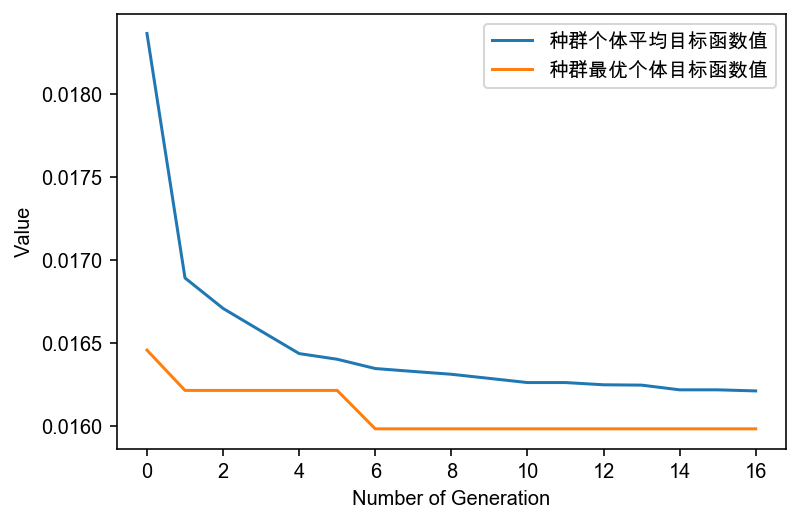

Saving...
种群信息导出完毕。
最优的目标函数值为：0.01598348463754694
最优的控制变量值为：
5830.0
213.0
0.8368316500538716
0.9023270136625854
有效进化代数：17
最优的一代是第 7 代
评价次数：340
时间已过 2120.1551427841187 秒

Testing...

get_data(hour_num=0, transform='sin+cos', drop_time=True, scale=True)

Input space:  Index(['wind_speed', 'sin(wd)', 'cos(wd)'], dtype='object') 


Test MSE 0.016345243166925268


In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import geatpy as ea # import geatpy
from MyProblem import MyProblem # 导入自定义问题接口
%config InlineBackend.figure_format='retina'

if __name__ == '__main__':
    """===============================实例化问题对象==========================="""
    PoolType = 'Process' # 设置采用多进程，若修改为: PoolType = 'Thread'，则表示用多线程
    problem = MyProblem(PoolType) # 生成问题对象
    """=================================种群设置==============================="""
    Encoding = 'RI'       # 编码方式
    
    NIND = 20             # 种群规模
    
    print('种群规模:', NIND)
    Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders) # 创建区域描述器
    population = ea.Population(Encoding, Field, NIND) # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
    """===============================算法参数设置============================="""
    myAlgorithm = ea.soea_SEGA_templet(problem, population) # 实例化一个算法模板对象
    
    myAlgorithm.MAXGEN = 100 # 最大进化代数
    
    print('最大进化代数:', myAlgorithm.MAXGEN)
    myAlgorithm.trappedValue = 1e-6 # “进化停滞”判断阈值
    myAlgorithm.maxTrappedCount = 10 # 进化停滞计数器最大上限值，如果连续maxTrappedCount代被判定进化陷入停滞，则终止进化
    """==========================调用算法模板进行种群进化======================="""
    print('Running...')
    [population, obj_trace, var_trace] = myAlgorithm.run() # 执行算法模板
    print('Saving...')
    population.save() # 把最后一代种群的信息保存到文件中
    problem.pool.close() # 及时关闭问题类中的池，否则在采用多进程运算后内存得不到释放
    # 输出结果
    best_gen = np.argmin(problem.maxormins * obj_trace[:, 1]) # 记录最优种群个体是在哪一代
    best_ObjV = obj_trace[best_gen, 1]
    print('最优的目标函数值为：%s'%(best_ObjV))
    print('最优的控制变量值为：')
    for i in range(var_trace.shape[1]):
        print(var_trace[best_gen, i])
    print('有效进化代数：%s'%(obj_trace.shape[0]))
    print('最优的一代是第 %s 代'%(best_gen + 1))
    print('评价次数：%s'%(myAlgorithm.evalsNum))
    print('时间已过 %s 秒'%(myAlgorithm.passTime))
    """=================================检验结果==============================="""
    print('\nTesting...\n')
    problem.test(n_readout = int(var_trace[best_gen, 0]), n_components = int(var_trace[best_gen, 1]),
                damping = var_trace[best_gen, 2], weight_scaling = var_trace[best_gen, 3])